0.6375586227676567
optimized steps
(0, 0)
(1, 0)
(1, 1)
(1, 2)
(2, 2)


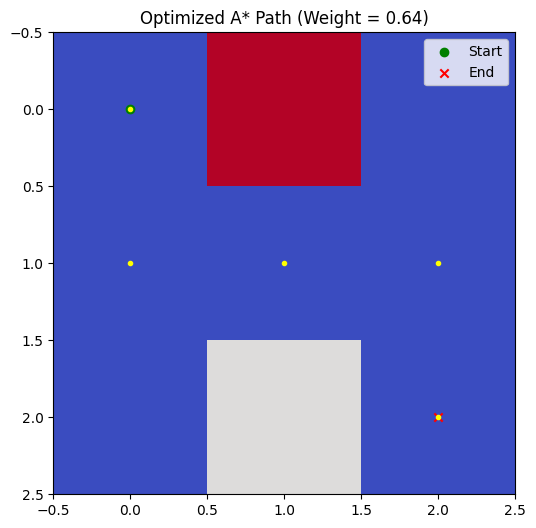

In [15]:
#Implement A* and Genetic algorithm for path finding task

import numpy as np
import random
import matplotlib.pyplot as plt
import heapq
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

class GridEnvironment:
    def __init__(self, size=(3,3), start=(0,0), end=(2,2)):
        self.size = size
        self.start = start
        self.end = end
        self.grid = np.zeros(size)
        self.static_obstacles = []
        self.dynamic_obstacles = []
        self.place_static_obstacles()

    def place_static_obstacles(self, count=1):
        while len(self.static_obstacles) < count:
            r = random.randint(0, self.size[0]-1)
            c = random.randint(0, self.size[1]-1)
            if (r, c) not in [self.start, self.end] and self.grid[r, c] == 0:
                self.grid[r, c] = 1
                self.static_obstacles.append((r, c))

    def update_dynamic_obstacles(self):
        for pos in self.dynamic_obstacles:
            self.grid[pos] = 0
        self.dynamic_obstacles.clear()

        count = 1
        while len(self.dynamic_obstacles) < count:
            r = random.randint(0, self.size[0]-1)
            c = random.randint(0, self.size[1]-1)
            if (r, c) not in [self.start, self.end] and self.grid[r, c] == 0:
                self.grid[r, c] = 2
                self.dynamic_obstacles.append((r, c))

    def display_grid(self, path=None, title="Path"):
        plt.imshow(self.grid, cmap='coolwarm', origin='upper')
        plt.scatter(self.start[1], self.start[0], marker='o', color='green', label='Start')
        plt.scatter(self.end[1], self.end[0], marker='x', color='red', label='End')
        if path:
            for p in path:
                plt.scatter(p[1], p[0], marker='.', color='yellow')
        plt.title(title)
        plt.legend()
        plt.show()

def a_star_search_weighted(env, weight=1):
    def heuristic(a, b):
        return abs(a[0] - b[0]) + abs(a[1] - b[1])

    start, goal = env.start, env.end
    open_set = []
    heapq.heappush(open_set, (0, start))
    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    while open_set:
        _, current = heapq.heappop(open_set)
        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path

        for dr, dc in [(-1,0), (1,0), (0,-1), (0,1)]:
            neighbor = (current[0] + dr, current[1] + dc)
            if (0 <= neighbor[0] < env.size[0] and 0 <= neighbor[1] < env.size[1] and env.grid[neighbor] == 0):
                tentative_g = g_score[current] + 1
                if tentative_g < g_score.get(neighbor, float('inf')):
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g
                    f_score[neighbor] = tentative_g + weight * heuristic(neighbor, goal)
                    heapq.heappush(open_set, (f_score[neighbor], neighbor))
    return []

def optimize_a_star_weight(env, generations=30, population_size=20, mutation_rate=0.1):
    def fitness(weight):
        try:
            path = a_star_search_weighted(env, weight)
            return -len(path) if path else float('inf')
        except:
            return float('inf')

    def mutate(w):
        return max(0.1, w + random.uniform(-0.2, 0.2))

    population = [random.uniform(0.5, 3.0) for _ in range(population_size)]
    for _ in range(generations):
        population.sort(key=fitness)
        next_gen = population[:5]
        while len(next_gen) < population_size:
            p1, p2 = random.choices(population[:10], k=2)
            child = (p1 + p2) / 2.0
            child = mutate(child)
            next_gen.append(child)
        population = next_gen
    best_weight = population[0]
    print(best_weight)
    best_path = a_star_search_weighted(env, best_weight)
    return best_weight, best_path

def compare_astar_genetic_optimized():
    env = GridEnvironment(size=(3, 3), start=(0, 0), end=(2, 2))
    env.update_dynamic_obstacles()

    weight, optimized_path = optimize_a_star_weight(env)

    plt.figure(figsize=(6, 6))
    plt.imshow(env.grid, cmap='coolwarm', origin='upper')
    plt.scatter(env.start[1], env.start[0], marker='o', color='green', label='Start')
    plt.scatter(env.end[1], env.end[0], marker='x', color='red', label='End')
    print('optimized steps')
    for p in optimized_path:
        print(p)
        plt.scatter(p[1], p[0], marker='.', color='yellow')
    plt.title(f"Optimized A* Path (Weight = {weight:.2f})")
    plt.legend()
    plt.show()

compare_astar_genetic_optimized()
